### Import

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import eugene as eu
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Global seed set to 13
2024-03-05 14:06:51.919857: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-05 14:06:52.008793: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-05 14:06:52.011376: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-05 14:06:52.011386: I tensorflow/compiler/xla/stream_executor/cuda/cuda

### Configuring

In [2]:
%matplotlib inline

if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload 
    
%autoreload 2

In [3]:
eu.settings.config_dir  = "./tutorial_configs"  
eu.settings.dataset_dir = "./eugene/datasets/janggu_resources" 
eu.settings.logging_dir = "./tutorial_logs"     
eu.settings.output_dir  = "./tutorial_output"   
eu.settings.figure_dir  = "./tutorial_figures" 

### Path

In [4]:
data_path = '/home/behrooz/BehroozDir/UCSD Course/Genomics/Project/Genomics/Data/'

### Read Sequence Data

### Train 

In [5]:
sdata_train = eu.dl.read_csv(filename= data_path + 'Train_Enhancers.csv', 
                             seq_col= 'seq',
                             target_col= 'target',
                             sep=',',
                             col_names=['seq', 'target', 'seq_len'])

In [6]:
print(sdata_train)

SeqData object with = 113548 seqs
seqs = (113548,)
names = (113548,)
rev_seqs = None
ohe_seqs = None
ohe_rev_seqs = None
seqs_annot: 'target'
pos_annot: None
seqsm: None
uns: None


### Test

In [7]:
sdata_test = eu.dl.read_csv(filename= data_path + 'Test_Enhancers.csv', 
                            seq_col= 'seq',
                            target_col= 'target',
                            sep=',',
                            col_names=['seq', 'target', 'seq_len'])

In [8]:
print(sdata_test)

SeqData object with = 28356 seqs
seqs = (28356,)
names = (28356,)
rev_seqs = None
ohe_seqs = None
ohe_rev_seqs = None
seqs_annot: 'target'
pos_annot: None
seqsm: None
uns: None


### Reverse Complement of Seqs

In [9]:
reverse_complement = True

In [10]:
if reverse_complement:
    eu.pp.reverse_complement_seqs_sdata(sdata_train, vocab="DNA")
    eu.pp.reverse_complement_seqs_sdata(sdata_test,  vocab="DNA")

Reverse complementing sequences:   0%|          | 0/113548 [00:00<?, ?it/s]

SeqData object modified:
	rev_seqs: None -> 113548 rev_seqs added


Reverse complementing sequences:   0%|          | 0/28356 [00:00<?, ?it/s]

SeqData object modified:
	rev_seqs: None -> 28356 rev_seqs added


### One-Hot Encode

In [11]:
eu.pp.ohe_seqs_sdata(sdata_train, vocab="DNA")
eu.pp.ohe_seqs_sdata(sdata_test , vocab="DNA")

One-hot encoding sequences:   0%|          | 0/113548 [00:00<?, ?it/s]

One-hot encoding sequences:   0%|          | 0/113548 [00:00<?, ?it/s]

SeqData object modified:
	ohe_seqs: None -> 113548 ohe_seqs added
	ohe_rev_seqs: None -> 113548 ohe_rev_seqs added


One-hot encoding sequences:   0%|          | 0/28356 [00:00<?, ?it/s]

One-hot encoding sequences:   0%|          | 0/28356 [00:00<?, ?it/s]

SeqData object modified:
	ohe_seqs: None -> 28356 ohe_seqs added
	ohe_rev_seqs: None -> 28356 ohe_rev_seqs added


### Data Shape

### Train

In [12]:
print(sdata_train)

SeqData object with = 113548 seqs
seqs = (113548,)
names = (113548,)
rev_seqs = (113548,)
ohe_seqs = (113548, 4, 400)
ohe_rev_seqs = (113548, 4, 400)
seqs_annot: 'target'
pos_annot: None
seqsm: None
uns: None


In [13]:
print(sdata_train.seqs[0])
print('**************')
if reverse_complement:
    print(sdata_train.rev_seqs[0])
print('**************')
print(sdata_train.names[:4])
print('**************')
print(sdata_train.ohe_seqs[0,:,:4])
print('**************')
sdata_train.seqs_annot.head(3)

TGACTCCCCAGCGGCCCCCTGCCCTGCAGGTATTTGCTGTCTCCTGAATATTCAAATGGACAGTCCCTCCCTCAGACTCCACCCAACGGGAGGCCTGGGCTGACTGTCCGGAGGGTGGTGCTTCCCCTTCCTTCCCAGGGCCAAAAACCAAACAAAACCCTGGTAGACATGTGATAGAATAATCATAAATACATAAAATTAGCCATGTAAATTGTGAAACATTAAGTTTCAGTTCCACAGACTGTGAAAATAGCAAAGTTTCCAACAAGGTCGAAANNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
**************
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTTTCGACCTTGTTGGAAACTTTGCTATTTTCACAGTCTGTGGAACTGAAACTTAATGTTTCACAATTTACATGGCTAATTTTATGTATTTATGATTATTCTATCACATGTCTACCAGGGTTTTGTTTGGTTTTTGGCCCTGGGAAGGAAGGGGAAGCACCACCCTCCGGACAGTCAGCCCAGGCCTCCCGTTGGGTGGAGTCTGAGGGAGGGACTGTCCATTTGAATATTCAGGAGACAGCAAATACCTGCAGGGCAGGGGGCCGCTGGGGAGTCA
**************
['seq000000' 'seq000001' 'seq000002' 'seq000003']
**************
[[0 0 1 0]
 [0 0 0 1]
 [0 1 0 0]
 [1 0 0 0]]
**************


,target
seq000000,1.0
seq000001,1.0
seq000002,1.0


### Test

In [14]:
print(sdata_test)

SeqData object with = 28356 seqs
seqs = (28356,)
names = (28356,)
rev_seqs = (28356,)
ohe_seqs = (28356, 4, 400)
ohe_rev_seqs = (28356, 4, 400)
seqs_annot: 'target'
pos_annot: None
seqsm: None
uns: None


In [15]:
print(sdata_test.seqs[0])
print('**************')
if reverse_complement:
    print(sdata_test.rev_seqs[0])
print('**************')
print(sdata_test.names[:4])
print('**************')
print(sdata_train.ohe_seqs[0,:,:4])
print('**************')
sdata_test.seqs_annot.head(3)

TGTCTGCCTTCCCTCAGCCTGTGAGCACCTTGAGGACAGGTTCTGCAGCTGAGGCACGTGGGTGAATGACTGAAGGAGGGAAGGAATGCACGAATGAGTGAGCAGCTAATCTACCTGTGTTGAATGTTCCTTCCCCTCCAGTCCGTCCTGCTGATACTTCCAGTCTTTCCTTAAGTACCTTTTGGGTTTTGCTACTTCCCTCCTCAAAGTCTCTCCACAGCTCCTTGTTTCTTAGCACATCCAGTCTATGCCTTTTCCCAGTTGCGGGTCTGCCTTACTCAGCCCATGGGTCACACTCACCAAACAGCCACCTTGTCCTTCTCTGGGCCAGCCCCATGCTGGCCACTTTCCCANNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
**************
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTGGGAAAGTGGCCAGCATGGGGCTGGCCCAGAGAAGGACAAGGTGGCTGTTTGGTGAGTGTGACCCATGGGCTGAGTAAGGCAGACCCGCAACTGGGAAAAGGCATAGACTGGATGTGCTAAGAAACAAGGAGCTGTGGAGAGACTTTGAGGAGGGAAGTAGCAAAACCCAAAAGGTACTTAAGGAAAGACTGGAAGTATCAGCAGGACGGACTGGAGGGGAAGGAACATTCAACACAGGTAGATTAGCTGCTCACTCATTCGTGCATTCCTTCCCTCCTTCAGTCATTCACCCACGTGCCTCAGCTGCAGAACCTGTCCTCAAGGTGCTCACAGGCTGAGGGAAGGCAGACA
**************
['seq00000' 'seq00001' 'seq00002' 'seq00003']
**************
[[0 0 1 0]
 [0 0 0 1]
 [0 1 0 0]
 [1 0 0 0]]
**************


,target
seq00000,1.0
seq00001,1.0
seq00002,1.0


### Train - Validation Split

In [16]:
eu.pp.train_test_split_sdata(sdata_train, split=0.9)

SeqData object modified:
    seqs_annot:
        + train_val


In [17]:
sdata_train.seqs_annot.head(3)

,target,train_val
seq000000,1.0,True
seq000001,1.0,True
seq000002,1.0,True


### Data Visualization

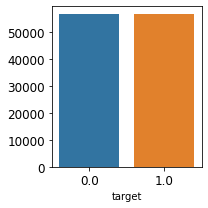

In [18]:
eu.pl.countplot(sdata_train, keys=["target"], figsize=(3, 3))

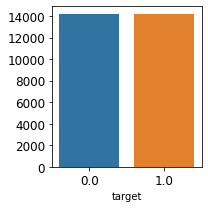

In [19]:
eu.pl.countplot(sdata_test, keys=["target"], figsize=(3, 3))

## DeepBind Model

In [20]:
input_seq_len = 400

if reverse_complement:
    strand_type= "ds"
else:
    strand_type= "ss"

In [21]:
DeepBind_model= eu.models.DeepBind(input_len= input_seq_len, 
                                   output_dim= 1, 
                                   strand= strand_type, 
                                   task= "binary_classification", 
                                   loss_fxn= "bce", 
                                   optimizer= "adam")
DeepBind_model.summary()

Model: DeepBind
Input length: 400
Output dimension: 1
Strand: ds
Task: binary_classification
Aggregation: max
Loss function: binary_cross_entropy_with_logits
Optimizer: adam
	Optimizer parameters: {}
Learning rate: 0.001
Scheduler: lr_scheduler
Scheduler patience: 2


  | Name      | Type                      | Params
--------------------------------------------------------
0 | hp_metric | BinaryAUROC               | 0     
1 | convnet   | BasicConv1D               | 1.0 K 
2 | max_pool  | MaxPool1d                 | 0     
3 | avg_pool  | AvgPool1d                 | 0     
4 | fcn       | BasicFullyConnectedModule | 1.1 K 
--------------------------------------------------------
2.1 K     Trainable params
0         Non-trainable params
2.1 K     Total params
0.009     Total estimated model params size (MB)

### Model Weight Initialization

In [22]:
eu.models.init_weights(DeepBind_model)

### Training

In [23]:
number_epochs = 25
batch_size = 128

if reverse_complement:
    version = "ds_DeepBind_model"
else:
    version = "ss_DeepBind_model"

In [24]:
eu.train.fit(model= DeepBind_model, 
             sdata= sdata_train, 
             gpus= 0, 
             target_keys= "target", 
             train_key= "train_val", 
             epochs= number_epochs, 
             batch_size= batch_size, 
             num_workers= 0, 
             seed= 13, 
             version= version)

Global seed set to 13


Dropping 0 sequences with NaN targets.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


No transforms given, assuming just need to tensorize.
No transforms given, assuming just need to tensorize.



  | Name      | Type                      | Params
--------------------------------------------------------
0 | hp_metric | BinaryAUROC               | 0     
1 | convnet   | BasicConv1D               | 1.0 K 
2 | max_pool  | MaxPool1d                 | 0     
3 | avg_pool  | AvgPool1d                 | 0     
4 | fcn       | BasicFullyConnectedModule | 1.1 K 
--------------------------------------------------------
2.1 K     Trainable params
0         Non-trainable params
2.1 K     Total params
0.009     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

/home/behrooz/anaconda3/envs/eugene/lib/python3.10/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/behrooz/anaconda3/envs/eugene/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: No negative samples in targets, false positive value should be meaningless. Returning zero tensor in false positive score
  warnings.warn(*args, **kwargs)
Global seed set to 13
/home/behrooz/anaconda3/envs/eugene/lib/python3.10/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on thi

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

/home/behrooz/anaconda3/envs/eugene/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

## Evaluation SS

### Loss 

In [25]:
if reverse_complement:
    log_path = os.path.join(eu.settings.logging_dir, "dsDeepBind_binary_classification", "ds_DeepBind_model")
else:
    log_path = os.path.join(eu.settings.logging_dir, "ssDeepBind_binary_classification", "ss_DeepBind_model")

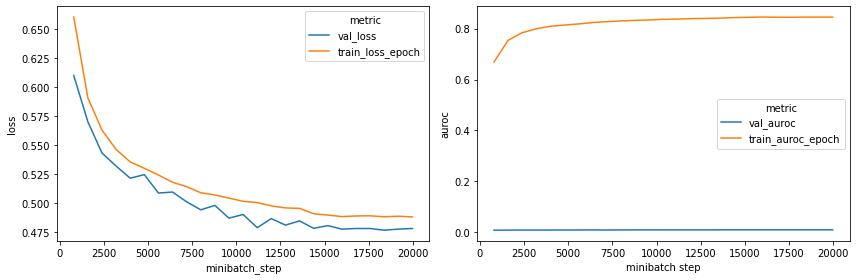

In [25]:
eu.pl.training_summary(log_path, 
                       metric="auroc", 
                       figsize=(12, 4))
plt.show()

### Load Best Model

In [26]:
model_file_DeepBind = glob.glob(os.path.join(log_path, "checkpoints", "*"))[0]

best_model_DeepBind = eu.models.DeepBind.load_from_checkpoint(model_file_DeepBind)

### AUC on Test

In [27]:
eu.evaluate.predictions(best_model_DeepBind, 
                        sdata= sdata_test, 
                        target_keys= "target", 
                        version= version,
                        file_label= "test", 
                        prefix= f"ss_DeepBind_model_")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


No transforms given, assuming just need to tensorize.


/home/behrooz/anaconda3/envs/eugene/lib/python3.10/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

SeqData object modified:
    seqs_annot:
        + ss_DeepBind_model_target_predictions


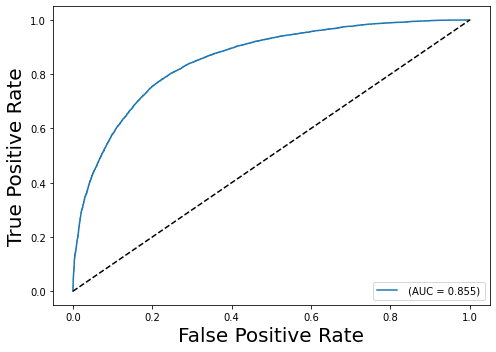

In [28]:
eu.pl.auroc(sdata_test, 
            target_keys= "target", 
            prediction_keys= version + "_target_predictions", 
            figsize= (7,5))
plt.show()

### Interpretation with Test

### Filter Visualization  

In [29]:
eu.interpret.generate_pfms_sdata(model=best_model_DeepBind, sdata=sdata_test, method="Minnoye20")

No transforms given, assuming just need to tensorize.


Getting maximial activating seqlets:   0%|          | 0/221 [00:00<?, ?it/s]

Getting filter activators for 16 filters:   0%|          | 0/16 [00:00<?, ?it/s]

Getting PFMs from filters:   0%|          | 0/16 [00:00<?, ?it/s]

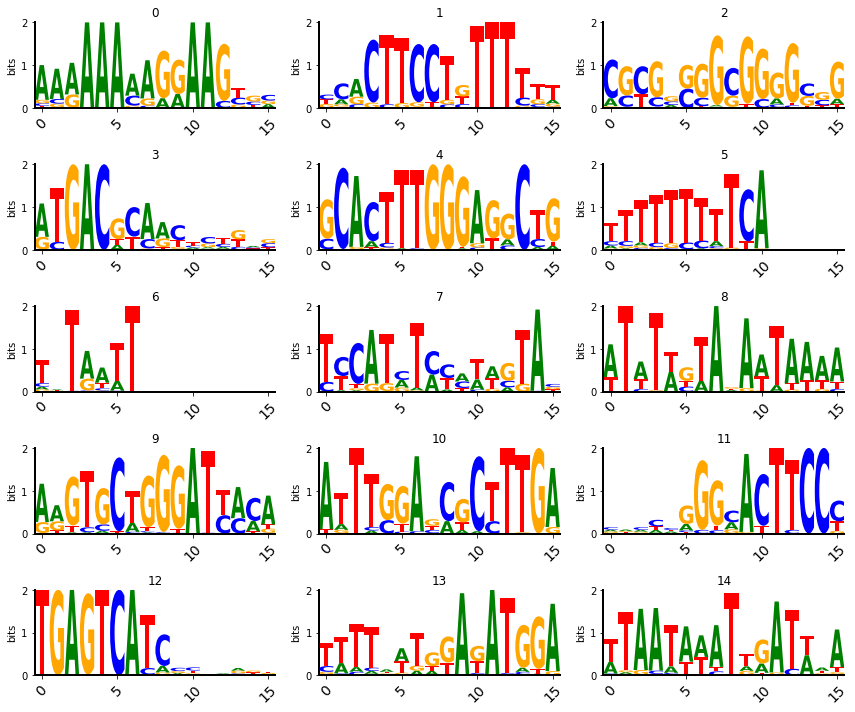

In [30]:
eu.pl.multifilter_viz(sdata_test, filter_ids=list(sdata_test.uns["pfms"].keys()), num_rows=5, num_cols=3)

### DeepLift

In [32]:
top3 = sdata_test[version + "_target_predictions"].sort_values(ascending=False).iloc[:3].index
bot3 = sdata_test[version + "_target_predictions"].sort_values(ascending=True).iloc[:3].index
print(top3)
print(bot3)

Index(['seq06168', 'seq10184', 'seq09719'], dtype='object')
Index(['seq23994', 'seq25894', 'seq24610'], dtype='object')


In [33]:
eu.interpret.feature_attribution_sdata(model=best_model_DeepBind, sdata=sdata_test, method="DeepLift")

No transforms given, assuming just need to tensorize.


Computing saliency on batches of size 128:   0%|          | 0/221 [00:00<?, ?it/s]

/home/behrooz/anaconda3/envs/eugene/lib/python3.10/site-packages/captum/attr/_core/deep_lift.py:336: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(
/home/behrooz/anaconda3/envs/eugene/lib/python3.10/site-packages/captum/attr/_core/deep_lift.py:467: UserWarning: An invalid module MaxPool1d(kernel_size=385, stride=385, padding=0, dilation=1, ceil_mode=False) is detected. Saved gradients will
                be used as the gradients of the module's input tensor.
                See MaxPool1d as an example.
  warnings.warn(
/home/behrooz/anaconda3/envs/eugene/lib/python3.10/site-packages/torch/nn/functional.py:651: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool1d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_ind

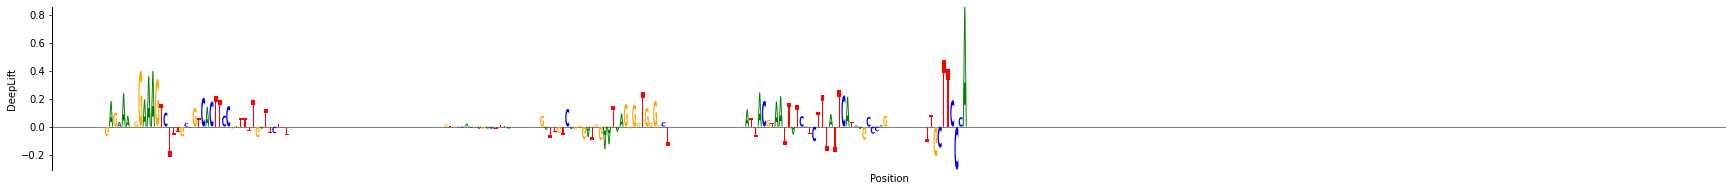

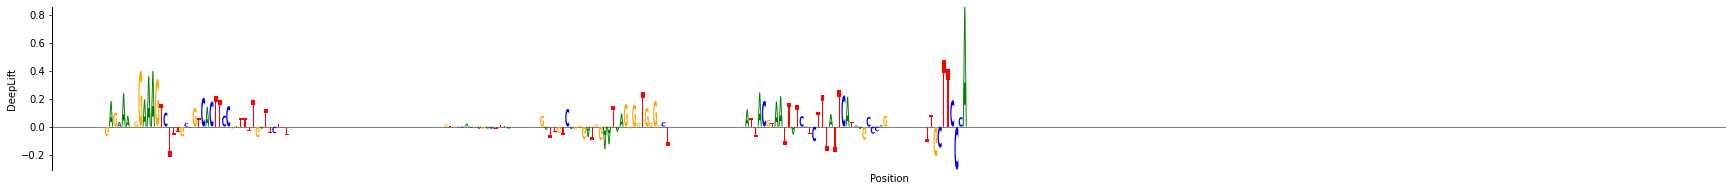

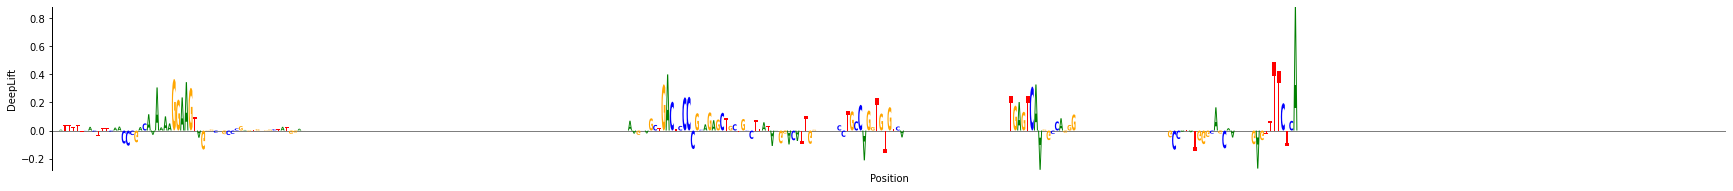

In [50]:
for top in top3:
    eu.pl.seq_track(sdata_test, seq_id=top, uns_key="DeepLift_imps", ylab="DeepLift", figsize=(30,3))
    plt.show()

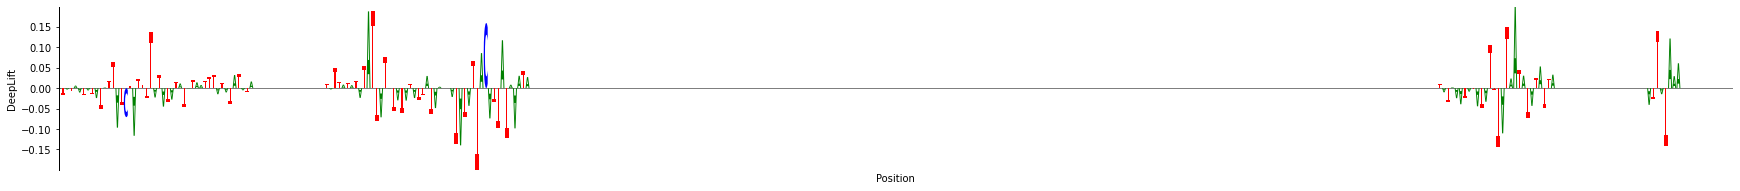

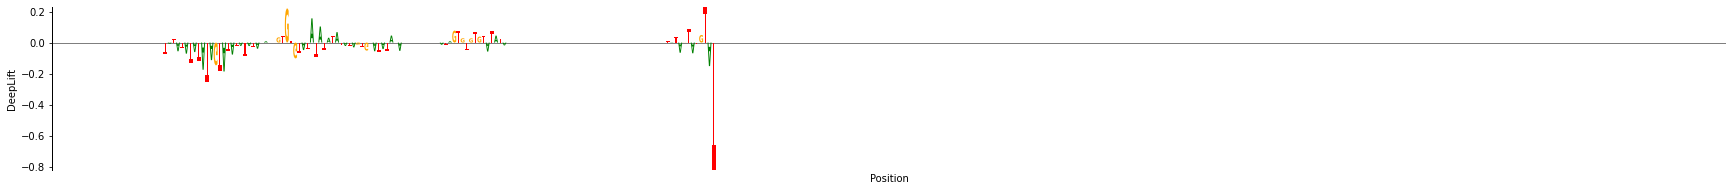

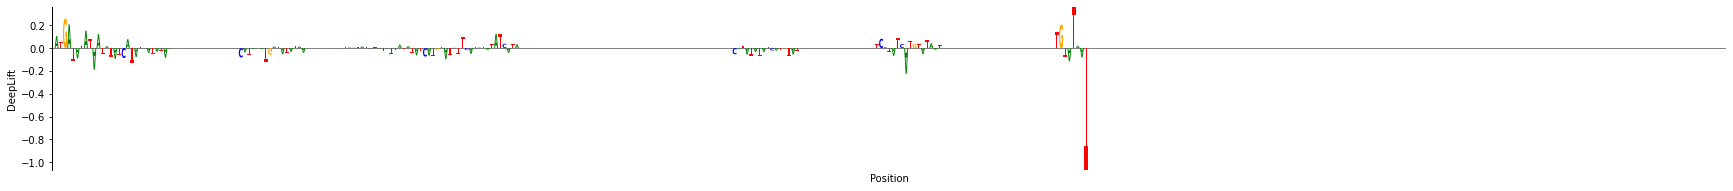

In [49]:
for bot in bot3:
    eu.pl.seq_track(sdata_test, seq_id=bot, uns_key="DeepLift_imps", ylab="DeepLift", figsize=(30,3))
    plt.show()

### InputXGradient 

In [51]:
eu.interpret.feature_attribution_sdata(model=best_model_DeepBind, sdata=sdata_test, method="InputXGradient")

No transforms given, assuming just need to tensorize.


Computing saliency on batches of size 128:   0%|          | 0/221 [00:00<?, ?it/s]

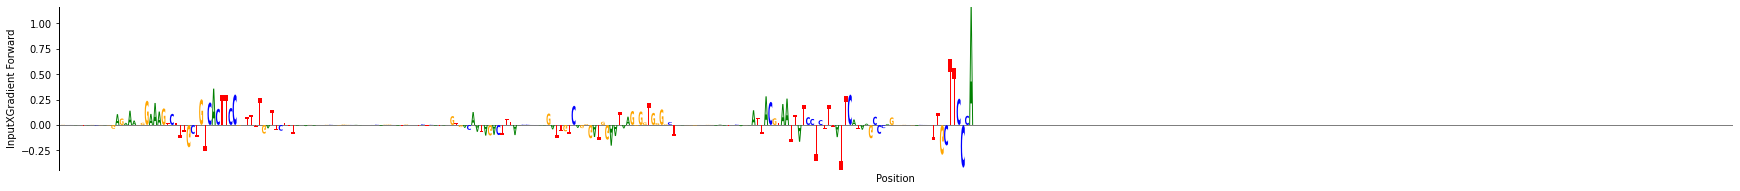

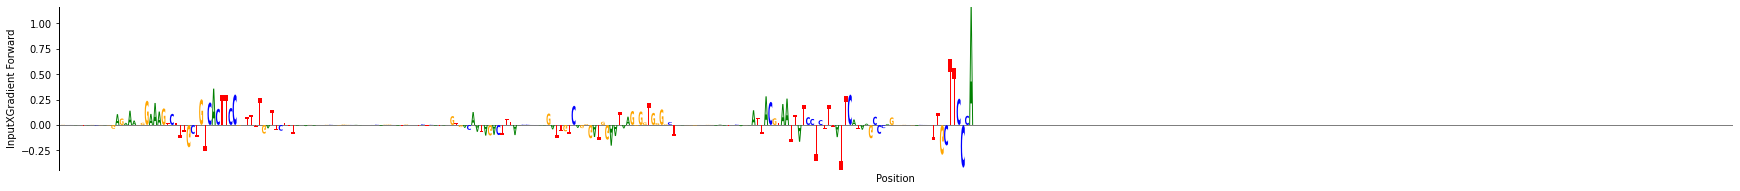

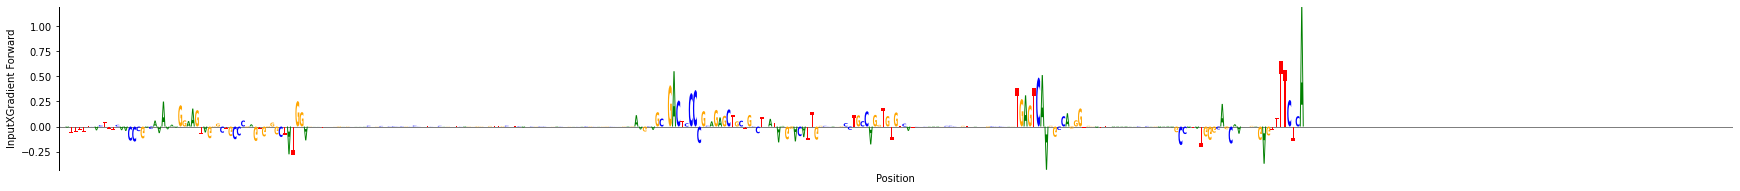

In [53]:
for top in top3:
    eu.pl.seq_track(sdata_test, seq_id=top, uns_key="InputXGradient_imps", ylab="InputXGradient Forward", 
                    figsize=(30,3))
    plt.show()

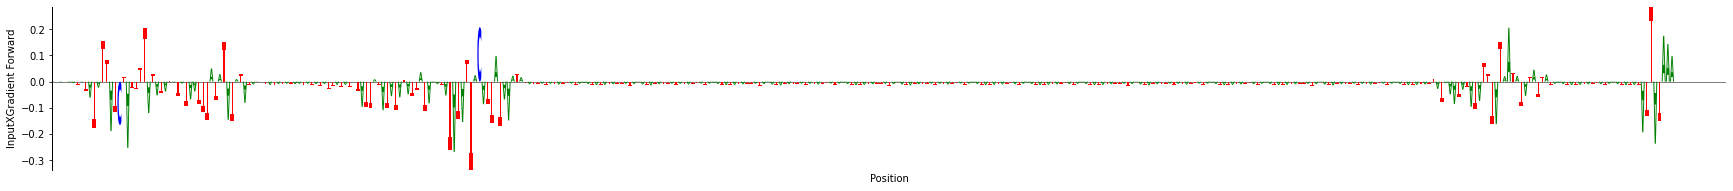

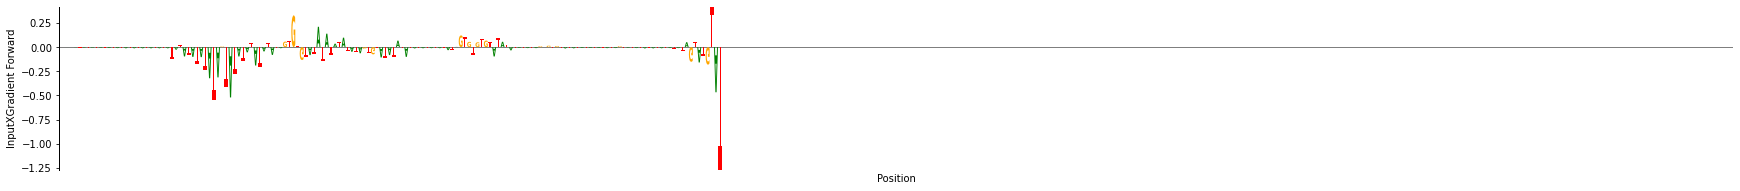

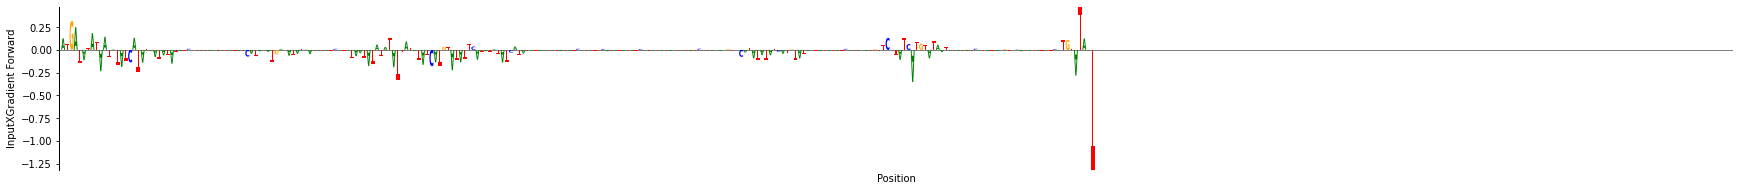

In [55]:
for bot in bot3:
    eu.pl.seq_track(sdata_test, seq_id=bot, uns_key="InputXGradient_imps", ylab="InputXGradient Forward", 
                    figsize=(30,3))
    plt.show()

## Evaluation DS

### Loss 

In [26]:
if reverse_complement:
    log_path = os.path.join(eu.settings.logging_dir, "dsDeepBind_binary_classification", "ds_DeepBind_model")
else:
    log_path = os.path.join(eu.settings.logging_dir, "ssDeepBind_binary_classification", "ss_DeepBind_model")

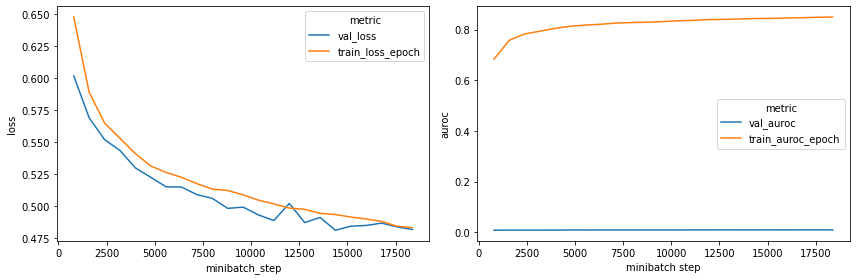

In [27]:
eu.pl.training_summary(log_path, 
                       metric="auroc", 
                       figsize=(12, 4))

plt.show()

### Load Best Model

In [28]:
model_file_DeepBind = glob.glob(os.path.join(log_path, "checkpoints", "*"))[0]

best_model_DeepBind = eu.models.DeepBind.load_from_checkpoint(model_file_DeepBind)

### AUC on Test

In [32]:
eu.evaluate.predictions(best_model_DeepBind, 
                        sdata= sdata_test, 
                        target_keys= "target", 
                        version= version,
                        file_label= "test", 
                        prefix= f"ds_DeepBind_model_")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


No transforms given, assuming just need to tensorize.


/home/behrooz/anaconda3/envs/eugene/lib/python3.10/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

SeqData object modified:
    seqs_annot:
        + ds_DeepBind_model_target_predictions


<Axes: xlabel='False Positive Rate', ylabel='True Positive Rate'>

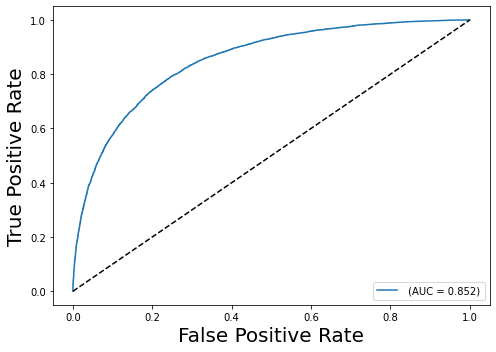

In [34]:
eu.pl.auroc(sdata_test, 
            target_keys="target",
            prediction_keys= version + "_target_predictions", 
            figsize=(7,5))

plt.show()

### Interpretation with Test

### Filter Visualization 

In [35]:
eu.interpret.generate_pfms_sdata(model=best_model_DeepBind, sdata=sdata_test, method="Minnoye20")

No transforms given, assuming just need to tensorize.


Getting maximial activating seqlets:   0%|          | 0/221 [00:00<?, ?it/s]

Getting filter activators for 16 filters:   0%|          | 0/16 [00:00<?, ?it/s]

Getting PFMs from filters:   0%|          | 0/16 [00:00<?, ?it/s]

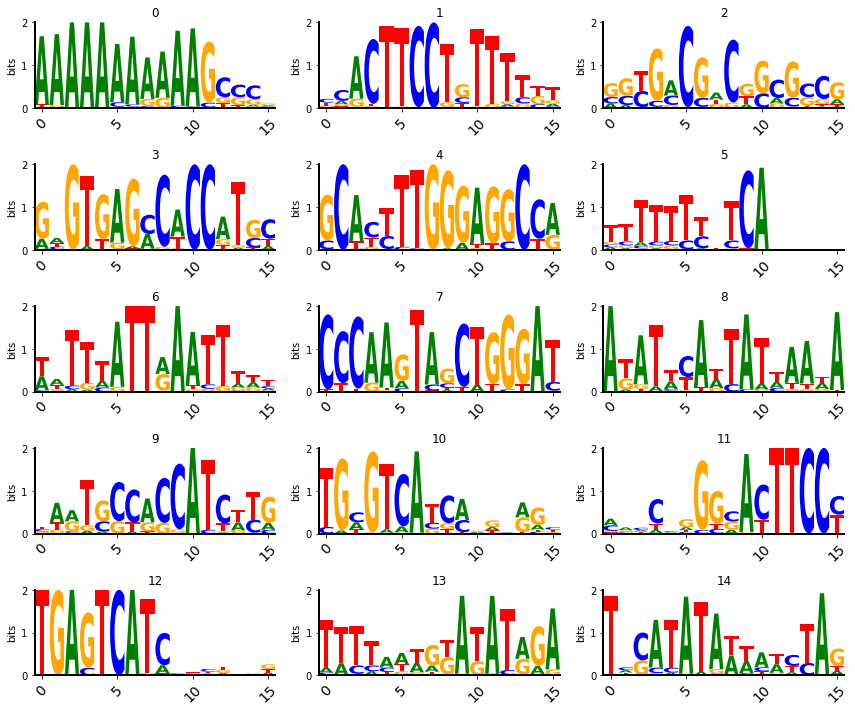

In [36]:
eu.pl.multifilter_viz(sdata_test, filter_ids=list(sdata_test.uns["pfms"].keys()), num_rows=5, num_cols=3)

### InputXGradient

In [37]:
top3 = sdata_test[version + "_target_predictions"].sort_values(ascending=False).iloc[:3].index
bot3 = sdata_test[version + "_target_predictions"].sort_values(ascending=True).iloc[:3].index
print(top3)
print(bot3)

Index(['seq05518', 'seq04628', 'seq11519'], dtype='object')
Index(['seq25268', 'seq17179', 'seq24610'], dtype='object')


In [38]:
eu.interpret.feature_attribution_sdata(model=best_model_DeepBind, sdata=sdata_test, method="InputXGradient")

No transforms given, assuming just need to tensorize.


Computing saliency on batches of size 128:   0%|          | 0/221 [00:00<?, ?it/s]

In [39]:
sdata_test.uns['forward_reverse'] = sdata_test.uns['InputXGradient_forward_imps'] + sdata_test.uns['InputXGradient_reverse_imps']

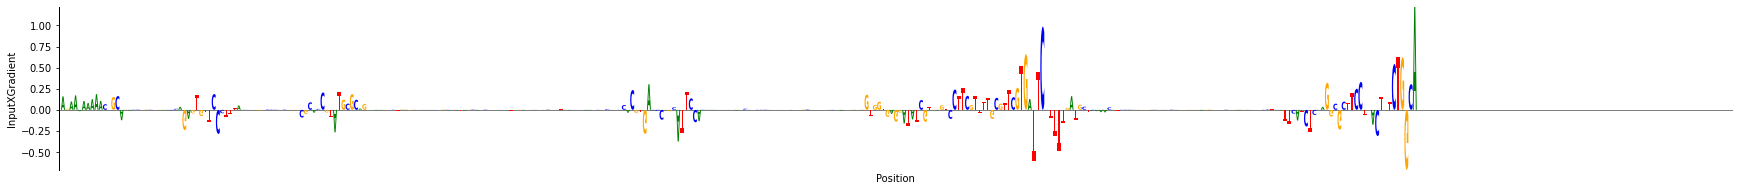

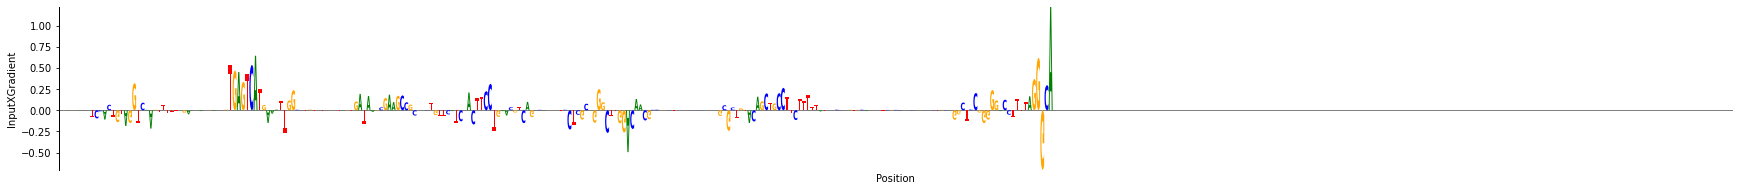

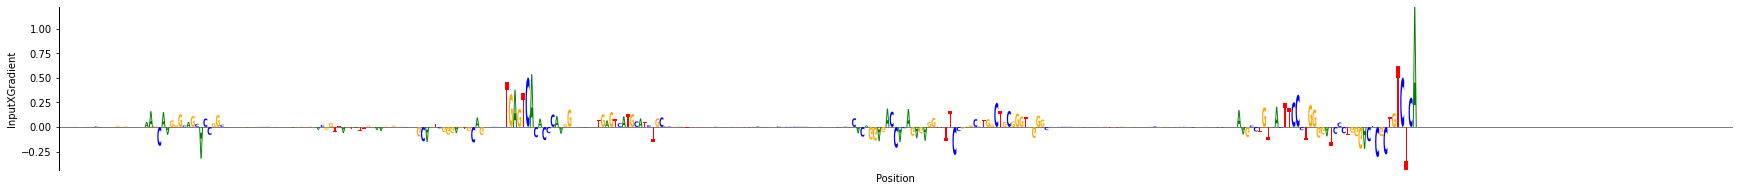

In [41]:
for top in top3:
    eu.pl.seq_track(sdata_test, seq_id=top, uns_key="forward_reverse", ylab="InputXGradient", 
                    figsize=(30,3))
    plt.show()

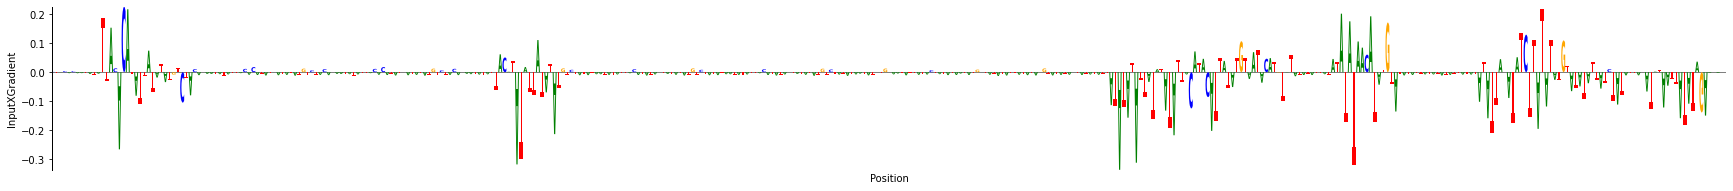

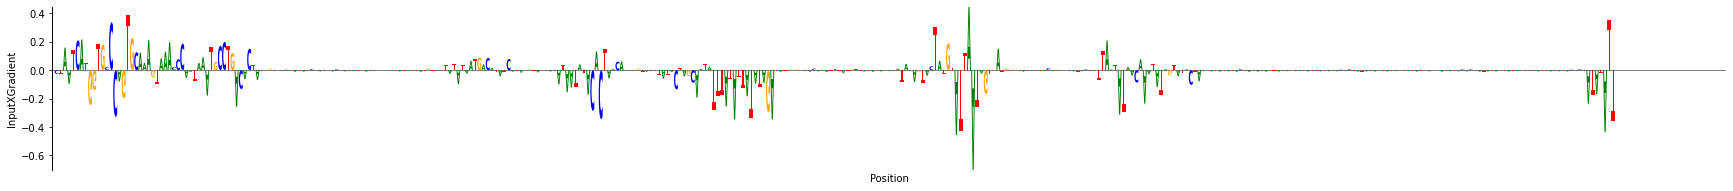

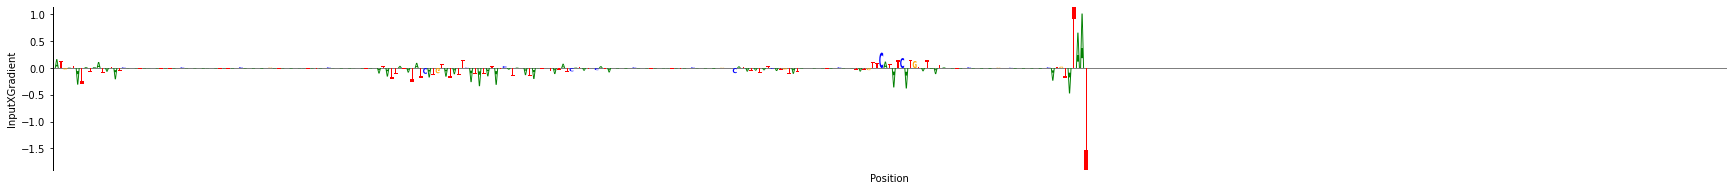

In [42]:
for bot in bot3:
    eu.pl.seq_track(sdata_test, seq_id=bot, uns_key="forward_reverse", ylab="InputXGradient", 
                    figsize=(30,3))
    plt.show()